# **ISB46703 PRINCIPLES OF ARTIFICIAL INTELLIGENCE**

# **Apple disease classification**

Arifah Ilyana Binti Mohd Haminuddin (52213224342)

Nurul Majdina binti Mahazer (52223224016)

Nurul Nabila binti muhammad huszaidi (522213123104)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# **ResNet50**


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Set paths
train_path = '/content/drive/MyDrive/apple/train'
valid_path = '/content/drive/MyDrive/apple/valid'
test_path = '/content/drive/MyDrive/apple/test'

In [4]:
# Define class labels
class_labels = ['healthy', 'rot', 'rust', 'scab']

In [5]:
# Data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(128,128),
    classes=class_labels,
    batch_size=8
)

valid_batches = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(128,128),
    classes=class_labels,
    batch_size=8
)

test_batches = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(128,128),
    classes=class_labels,
    batch_size=8,
   shuffle=False
)

Found 3523 images belonging to 4 classes.
Found 3528 images belonging to 4 classes.
Found 720 images belonging to 4 classes.


In [6]:
# Build the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_labels), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=50,
    verbose=2
)

Epoch 1/50
441/441 - 2318s - 5s/step - accuracy: 0.8720 - loss: 0.3530 - val_accuracy: 0.9719 - val_loss: 0.0861
Epoch 2/50
441/441 - 20s - 44ms/step - accuracy: 0.9608 - loss: 0.1108 - val_accuracy: 0.9787 - val_loss: 0.0633
Epoch 3/50
441/441 - 19s - 44ms/step - accuracy: 0.9821 - loss: 0.0547 - val_accuracy: 0.9816 - val_loss: 0.0565
Epoch 4/50
441/441 - 19s - 44ms/step - accuracy: 0.9835 - loss: 0.0455 - val_accuracy: 0.9827 - val_loss: 0.0460
Epoch 5/50
441/441 - 20s - 45ms/step - accuracy: 0.9875 - loss: 0.0357 - val_accuracy: 0.9858 - val_loss: 0.0369
Epoch 6/50
441/441 - 20s - 45ms/step - accuracy: 0.9918 - loss: 0.0228 - val_accuracy: 0.9870 - val_loss: 0.0357
Epoch 7/50
441/441 - 19s - 44ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9850 - val_loss: 0.0382
Epoch 8/50
441/441 - 20s - 45ms/step - accuracy: 0.9952 - loss: 0.0160 - val_accuracy: 0.9901 - val_loss: 0.0274
Epoch 9/50
441/441 - 20s - 46ms/step - accuracy: 0.9980 - loss: 0.0117 - val_accuracy: 0.9895 - 

In [12]:
# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

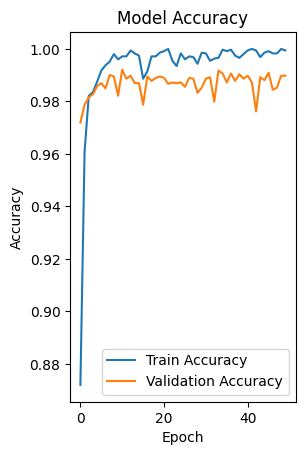

In [13]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

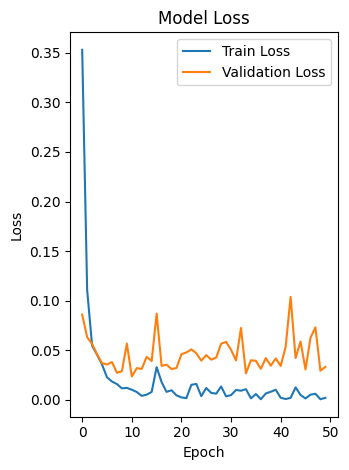

In [14]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(test_batches, verbose=0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Accuracy: 99.03%


In [16]:
# Confusion matrix
predictions = model.predict(test_batches, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_batches.classes, predicted_classes)

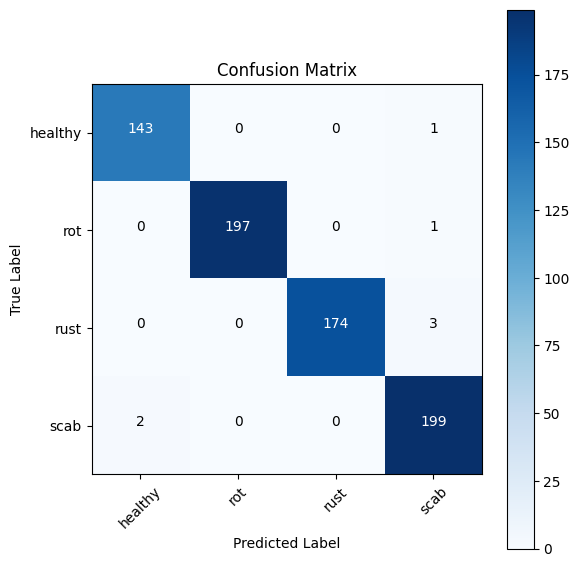

In [17]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

plot_confusion_matrix(cm=cm, classes=class_labels, title='Confusion Matrix')
plt.show()

In [20]:
# Test Accuracy
loss, accuracy = model.evaluate(test_batches, verbose=0)
print(f'✅Test Accuracy: {accuracy * 100:.2f}%')


predictions = model.predict(test_batches, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# Test mAP
y_true = test_batches.classes
y_scores = predictions  
from sklearn.metrics import average_precision_score # Import average_precision_score
map_score = average_precision_score(tf.keras.utils.to_categorical(y_true), y_scores, average='macro')
print(f"✅ Mean Average Precision (mAP): {map_score:.4f}")

# Test Training Time
import time
end_time = time.time()
training_time = end_time - history.epoch[0]  
print(f"⏱️ Total Training Time: {training_time:.2f} seconds")


✅Test Accuracy: 99.03%
✅ Mean Average Precision (mAP): 0.9997
⏱️ Total Training Time: 1749108972.35 seconds


# **Dense121**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
import time
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, average_precision_score

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
# Set paths
train_path = '/content/drive/MyDrive/apple/train'
valid_path = '/content/drive/MyDrive/apple/valid'
test_path = '/content/drive/MyDrive/apple/test'


In [23]:
# Define class labels
class_labels = ['healthy', 'rot', 'rust', 'scab']


In [24]:
# Data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(128,128),
    classes=class_labels,
    batch_size=8
)

valid_batches = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(128,128),
    classes=class_labels,
    batch_size=8
)

test_batches = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(128,128),
    classes=class_labels,
    batch_size=8,
    shuffle=False
)

Found 3523 images belonging to 4 classes.
Found 3528 images belonging to 4 classes.
Found 720 images belonging to 4 classes.


In [25]:
# Build the model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


In [27]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_labels), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
# Train the model and measure training time
start_time = time.time()
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=50,
    verbose=2
)
end_time = time.time()
training_time = end_time - start_time

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


441/441 - 66s - 150ms/step - accuracy: 0.8076 - loss: 0.5143 - val_accuracy: 0.9518 - val_loss: 0.1583
Epoch 2/50
441/441 - 20s - 44ms/step - accuracy: 0.9356 - loss: 0.1784 - val_accuracy: 0.9700 - val_loss: 0.0953
Epoch 3/50
441/441 - 19s - 44ms/step - accuracy: 0.9577 - loss: 0.1208 - val_accuracy: 0.9711 - val_loss: 0.0879
Epoch 4/50
441/441 - 19s - 44ms/step - accuracy: 0.9710 - loss: 0.0834 - val_accuracy: 0.9793 - val_loss: 0.0713
Epoch 5/50
441/441 - 19s - 44ms/step - accuracy: 0.9753 - loss: 0.0672 - val_accuracy: 0.9736 - val_loss: 0.0811
Epoch 6/50
441/441 - 20s - 44ms/step - accuracy: 0.9847 - loss: 0.0529 - val_accuracy: 0.9813 - val_loss: 0.0617
Epoch 7/50
441/441 - 20s - 45ms/step - accuracy: 0.9881 - loss: 0.0432 - val_accuracy: 0.9785 - val_loss: 0.0680
Epoch 8/50
441/441 - 19s - 44ms/step - accuracy: 0.9867 - loss: 0.0427 - val_accuracy: 0.9782 - val_loss: 0.0594
Epoch 9/50
441/441 - 20s - 46ms/step - accuracy: 0.9915 - loss: 0.0309 - val_accuracy: 0.9745 - val_loss: 

In [30]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

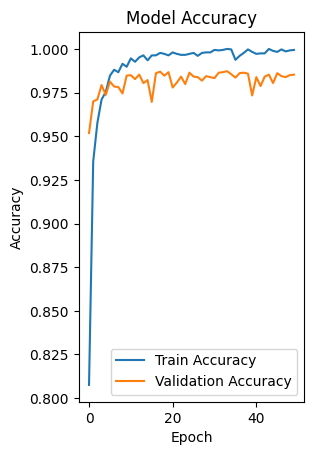

In [31]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

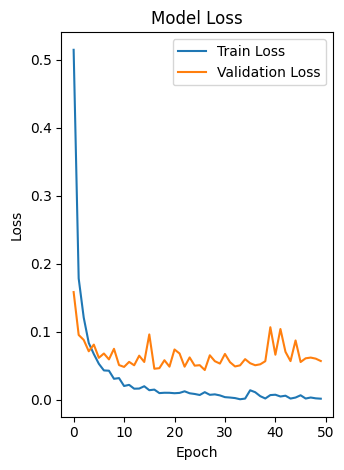

In [32]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(test_batches, verbose=0)
print(f'✅ Test Accuracy: {accuracy * 100:.2f}%')

✅ Test Accuracy: 98.75%


In [34]:
# Confusion matrix
predictions = model.predict(test_batches, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_batches.classes, predicted_classes)

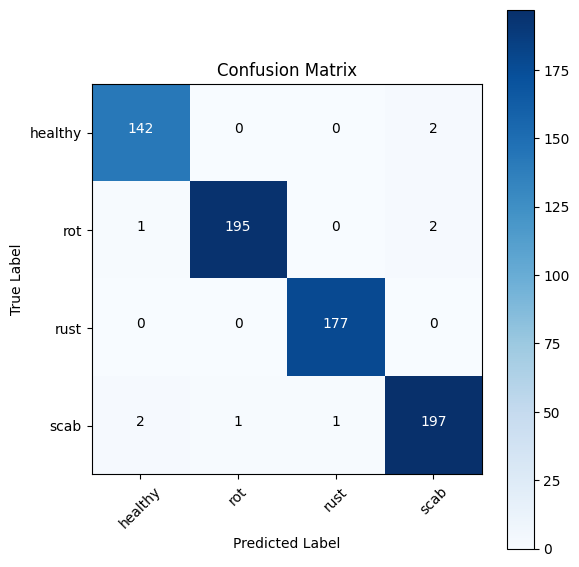

In [35]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

plot_confusion_matrix(cm=cm, classes=class_labels, title='Confusion Matrix')
plt.show()

In [36]:
# Test Accuracy
loss, accuracy = model.evaluate(test_batches, verbose=0)
print(f'✅Test Accuracy: {accuracy * 100:.2f}%')


predictions = model.predict(test_batches, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# Test mAP
y_true = test_batches.classes
y_scores = predictions  
from sklearn.metrics import average_precision_score # Import average_precision_score
map_score = average_precision_score(tf.keras.utils.to_categorical(y_true), y_scores, average='macro')
print(f"✅ Mean Average Precision (mAP): {map_score:.4f}")

# Test Training Time

print(f"⏱️ Total Training Time: {training_time:.2f} seconds")

✅Test Accuracy: 98.75%
✅ Mean Average Precision (mAP): 0.9995
⏱️ Total Training Time: 1016.08 seconds


# **MobileNetv3**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
import time
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, average_precision_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [53]:
# Set paths
train_path = '/content/drive/MyDrive/apple/train'
valid_path = '/content/drive/MyDrive/apple/valid'
test_path = '/content/drive/MyDrive/apple/test'

In [54]:
# Define class labels
class_labels = ['healthy', 'rot', 'rust', 'scab']

In [55]:
# Data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(128,128),
    classes=class_labels,
    batch_size=8
)

valid_batches = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(128,128),
    classes=class_labels,
    batch_size=8
)

test_batches = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(128,128),
    classes=class_labels,
    batch_size=8,
    shuffle=False
)

Found 3523 images belonging to 4 classes.
Found 3528 images belonging to 4 classes.
Found 720 images belonging to 4 classes.


In [56]:
# Load MobileNetV3
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [57]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


In [58]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_labels), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [59]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [60]:
# Train the model
start_time = time.time()
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=50,
    verbose=2
)
end_time = time.time()
training_time = end_time - start_time

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
441/441 - 43s - 97ms/step - accuracy: 0.8019 - loss: 0.5111 - val_accuracy: 0.9663 - val_loss: 0.1426
Epoch 2/50
441/441 - 18s - 41ms/step - accuracy: 0.9543 - loss: 0.1455 - val_accuracy: 0.9782 - val_loss: 0.0828
Epoch 3/50
441/441 - 18s - 40ms/step - accuracy: 0.9736 - loss: 0.0891 - val_accuracy: 0.9855 - val_loss: 0.0601
Epoch 4/50
441/441 - 18s - 42ms/step - accuracy: 0.9852 - loss: 0.0606 - val_accuracy: 0.9850 - val_loss: 0.0495
Epoch 5/50
441/441 - 18s - 40ms/step - accuracy: 0.9850 - loss: 0.0501 - val_accuracy: 0.9836 - val_loss: 0.0467
Epoch 6/50
441/441 - 18s - 41ms/step - accuracy: 0.9921 - loss: 0.0369 - val_accuracy: 0.9855 - val_loss: 0.0436
Epoch 7/50
441/441 - 18s - 41ms/step - accuracy: 0.9946 - loss: 0.0261 - val_accuracy: 0.9884 - val_loss: 0.0382
Epoch 8/50
441/441 - 17s - 39ms/step - accuracy: 0.9938 - loss: 0.0223 - val_accuracy: 0.9901 - val_loss: 0.0332
Epoch 9/50
441/441 - 18s - 40ms/step - accuracy: 0.9969 - loss: 0.0173 - val_accuracy: 0.9892 - 

In [61]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

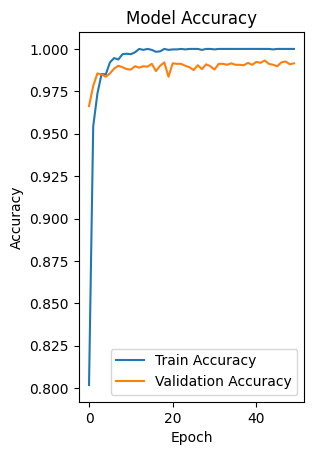

In [62]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

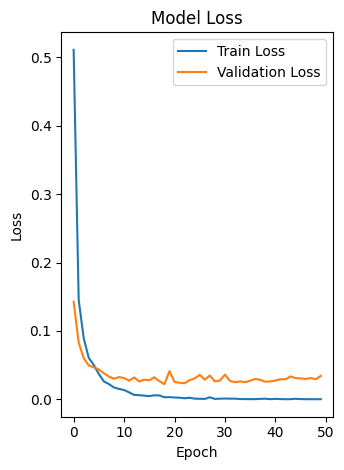

In [63]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [64]:
# Evaluate the model
loss, accuracy = model.evaluate(test_batches, verbose=0)
print(f'✅ Test Accuracy: {accuracy * 100:.2f}%')

✅ Test Accuracy: 98.33%


In [65]:
# Confusion matrix
predictions = model.predict(test_batches, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_batches.classes, predicted_classes)

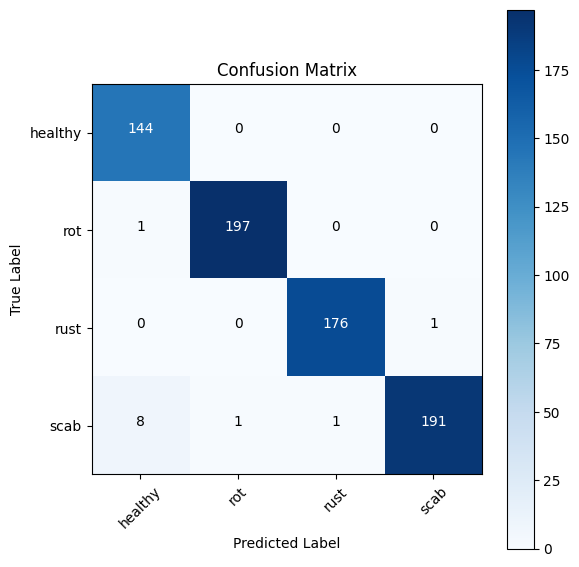

In [66]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

plot_confusion_matrix(cm=cm, classes=class_labels, title='Confusion Matrix')
plt.show()

In [67]:
# Test Accuracy 
loss, accuracy = model.evaluate(test_batches, verbose=0)
print(f'✅ Test Accuracy: {accuracy * 100:.2f}%')

# mAP
y_true = test_batches.classes
y_scores = predictions
map_score = average_precision_score(tf.keras.utils.to_categorical(y_true), y_scores, average='macro')
print(f"✅ Mean Average Precision (mAP): {map_score:.4f}")

# Training Time
print(f"⏱️ Total Training Time: {training_time:.2f} seconds")

✅ Test Accuracy: 98.33%
✅ Mean Average Precision (mAP): 0.9988
⏱️ Total Training Time: 909.47 seconds


**Conclusion**

Based on the evaluation that has been made, it is found that the best suited for this classification task is MobileNetV3. This is because it has a strong balance in terms of test accuracy which is 98.33% which is almost as high as ResNet50. Not only that, it also has a good mean average precision which is 0.9988 which is very close to the best. Finally, it has an efficient training time which is 909.47 seconds making it accurate and lightweight compared to other models.

DenseNet121 was not chosen because although it can achieve high test accuracy of 98.75% and good mAP of 0.9995, it has lower performance than MobileNetV3 and bigger training time than MobileNetV3 which is 1016.08 seconds.Moreover, the DenseNet121 model is a heavier model with many parameters which makes it less efficient.

ResNet50 was not chosen because although it got a high test accuracy of 99.03% and a good mAP of 0.9997 but the training time was very large because it was over 1 billion seconds which showed that it was not efficient in the training process.

In conclusion, while all three provide good accuracy and mAP, MobileNetV3 offers better accuracy, parameters, mAP and training time making it the most suitable for this classification task.